In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **EDA**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


1. 10000 rows and 14 columns with no null or missing values
2. It seems that there is no issue with the data
3. Need to drop Row Numbr, Customer ID, and Surname because it has no effect to the output
4. Exited is the target

In [7]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
obj = ["Geography","Gender"]
df[obj].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [9]:
df.duplicated().sum()

0

In [10]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

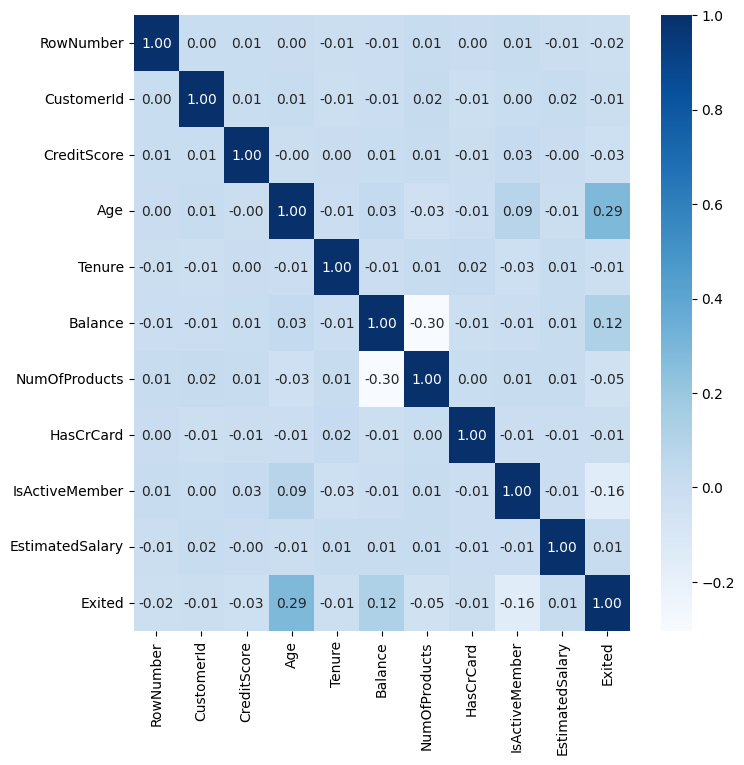

In [11]:
# correlation heatmap
plt.figure(figsize=(8,8))

sns.heatmap(df.corr(),cmap = "Blues",annot = True,fmt = '.2f')

# What to note the relationship
* Age vs Exited
* NOP vs Balance

<Figure size 1500x1500 with 0 Axes>

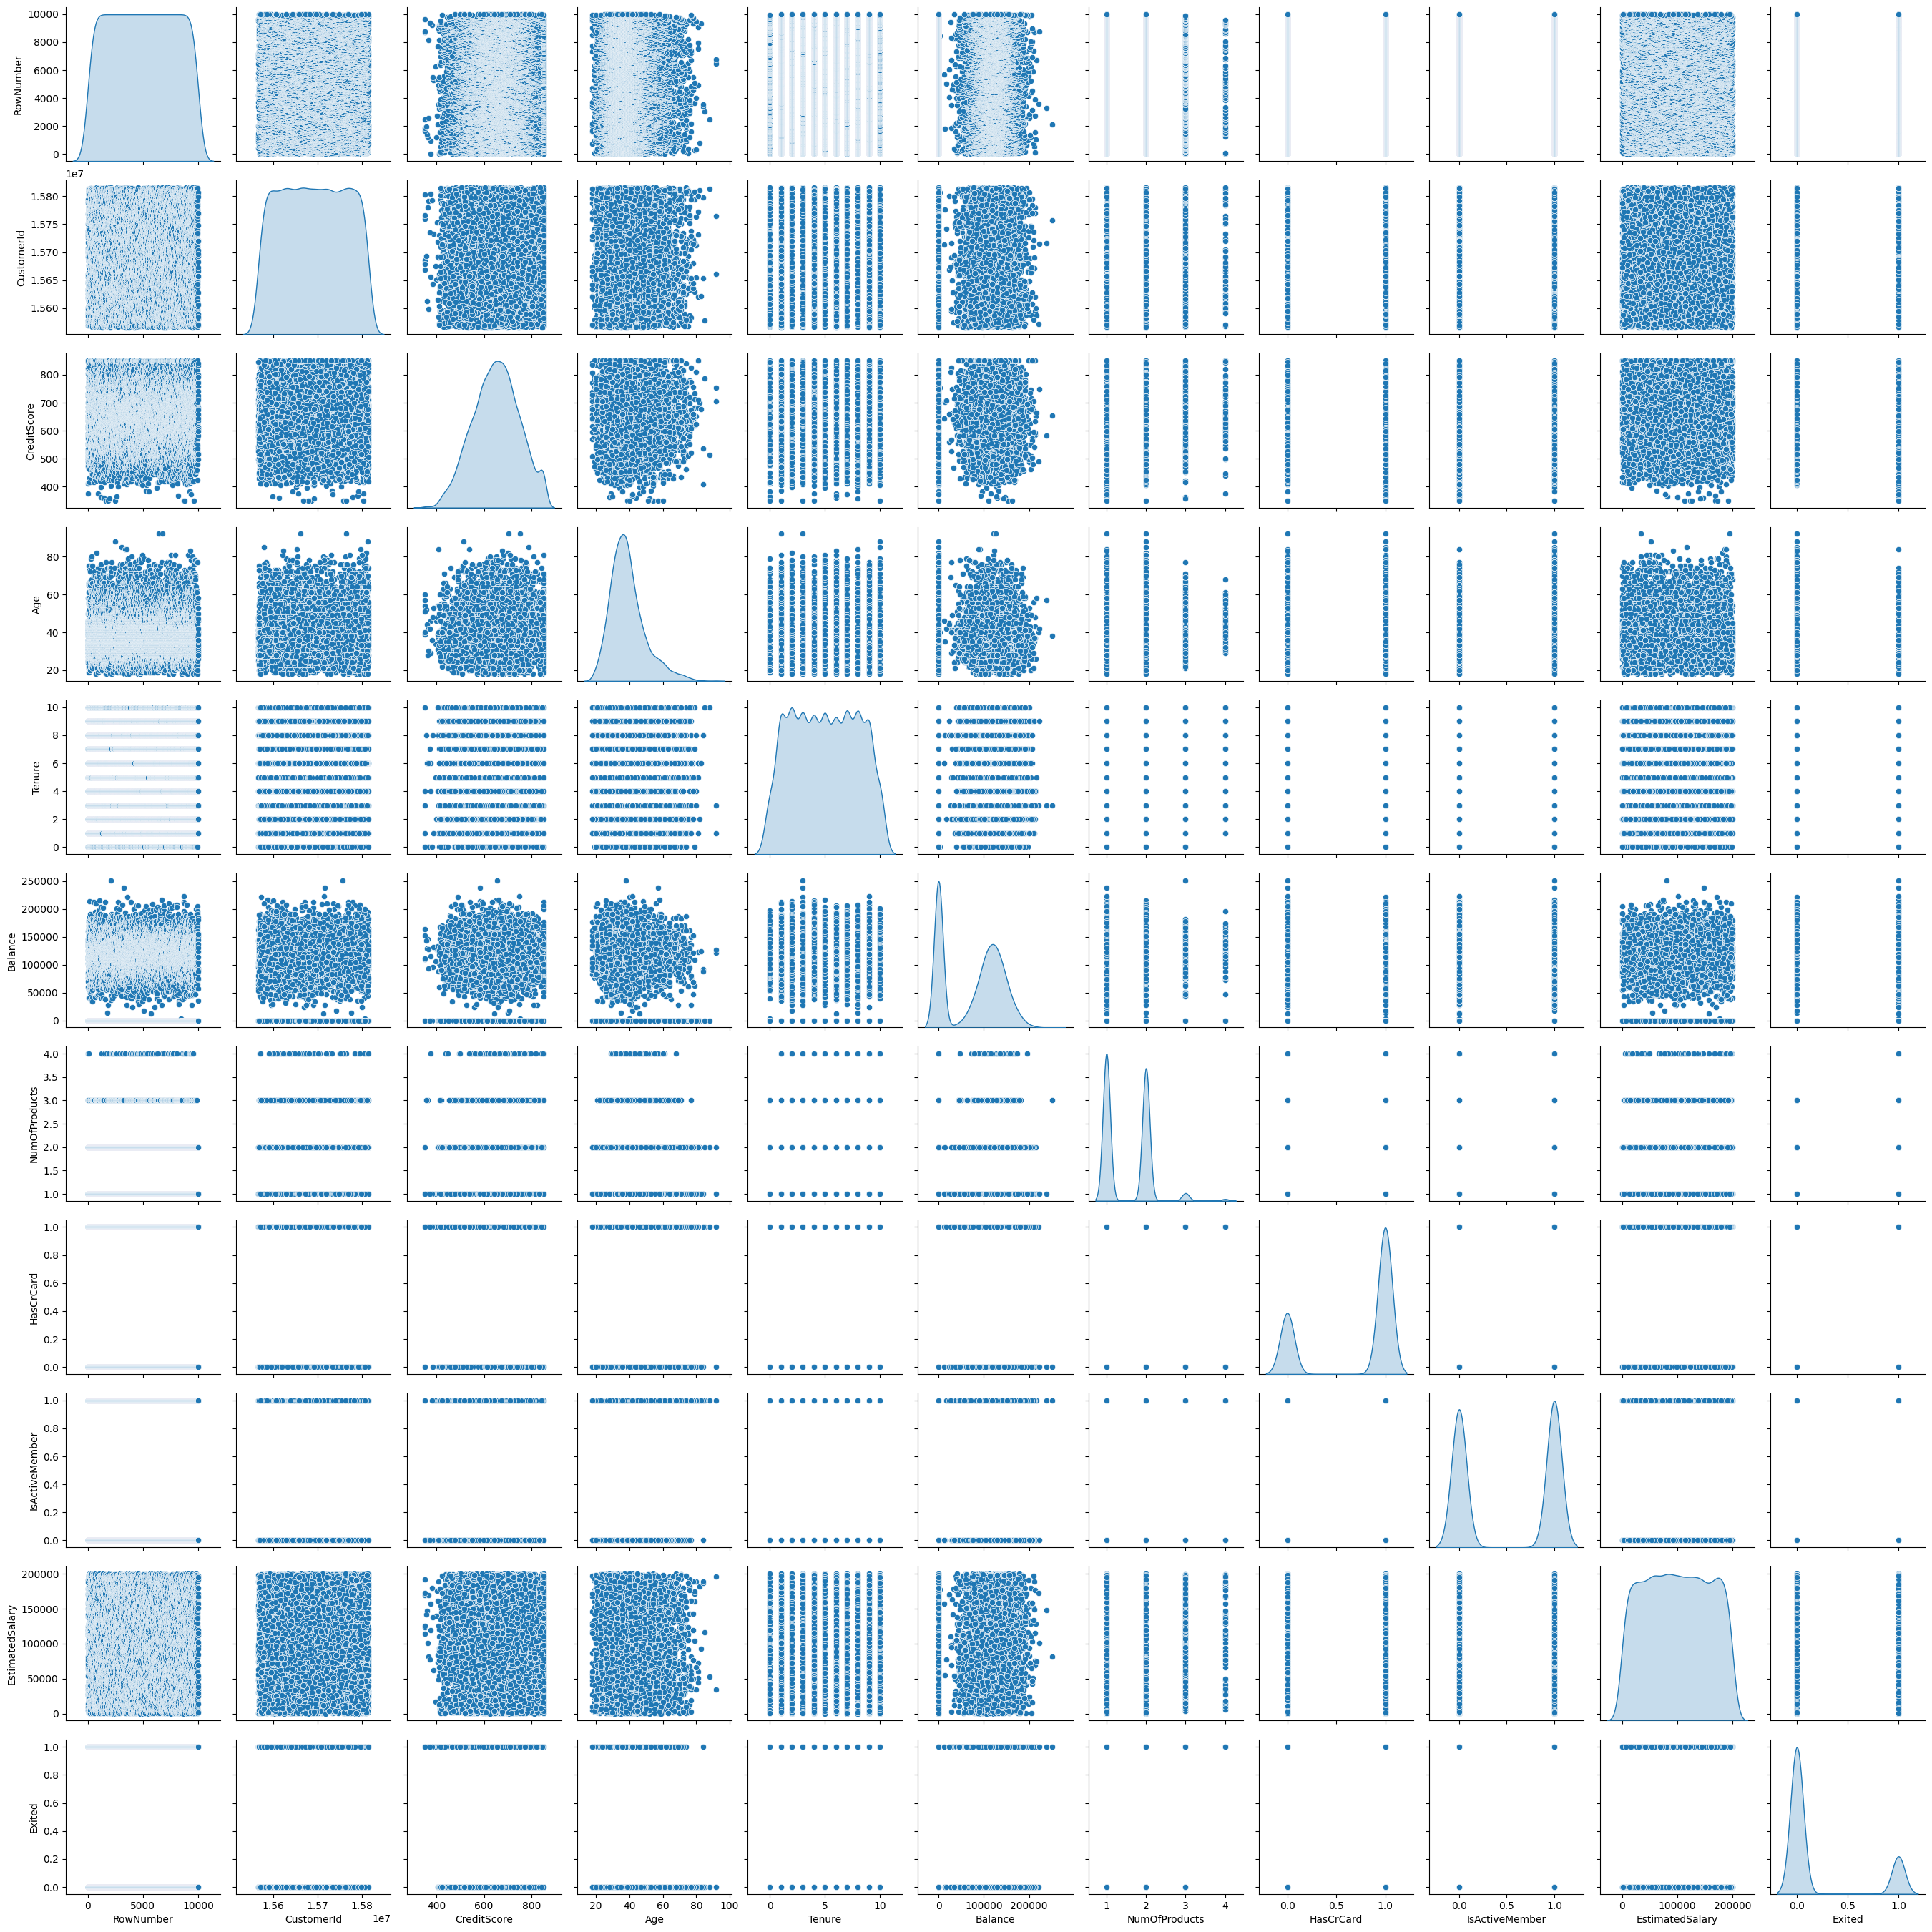

In [14]:
#here we also only use samples from the full dataset
plt.figure(figsize=(15,15))
sns.pairplot(df,diag_kind = 'kde')

# Univariate Analysis

In [27]:
num = ['Age','Tenure',"Balance","EstimatedSalary", "CreditScore"]
cats = ["NumOfProducts","HasCrCard","IsActiveMember","Geography","Gender"]
target = ["Exited"]

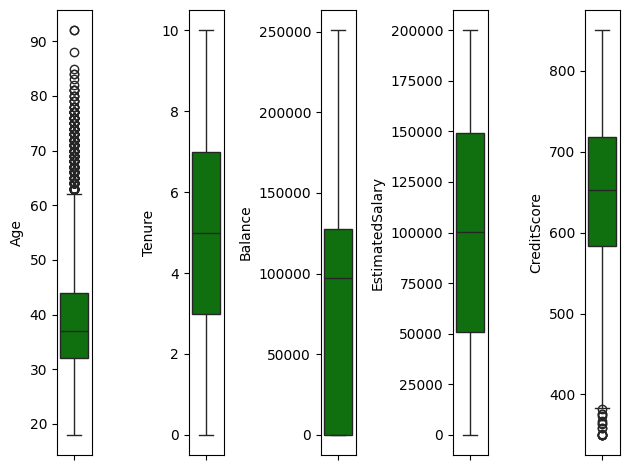

In [17]:
for i in range(0,len(num)):
  plt.subplot(1,len(num),i+1)
  sns.boxplot(y = df[num[i]], color = 'green',orient = 'v')
  plt.tight_layout()

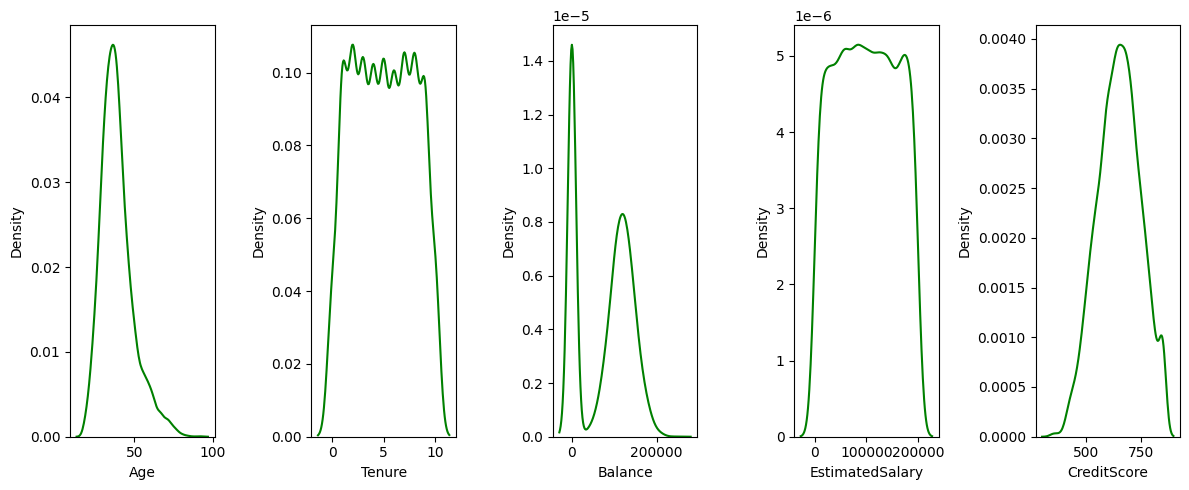

In [18]:
# Dist plot - num columns
plt.figure(figsize=(12,5))

for i in range(0,len(num)):
  plt.subplot(1,len(num),i+1)
  sns.kdeplot(x = df[num[i]],color = 'green')
  plt.xlabel(num[i])
  plt.tight_layout()

In [28]:
def plot(a):
  plt.figure(figsize=(25, 5))
  for i in range(0,len(a)):
    plt.subplot(2,3,i+1)
    sns.countplot(x = df[a[i]],color = 'green',orient = 'v')
    plt.show()

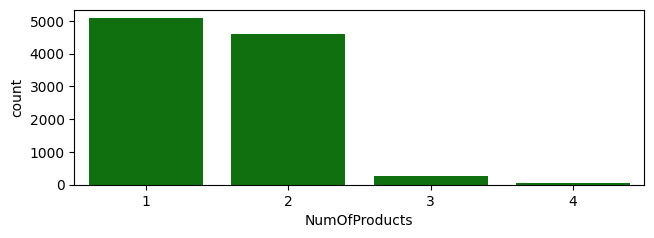

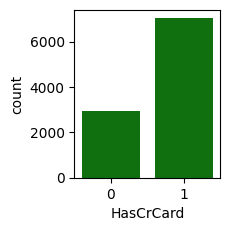

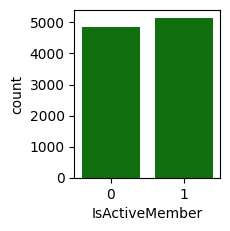

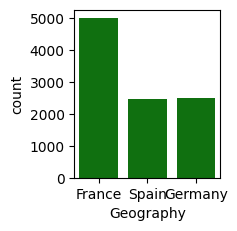

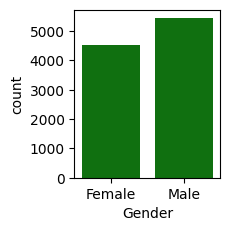

In [29]:
plot(cats)

# EDA Conclusion

Some things we find from this EDA dataset are:

* The data looks valid and there are no major/significant defects
* The NumOfProducts column and the EstimatedSalary column have fairly symmetric data
* Some features have a clear correlation with the target, they will be used
* Some features seem completely uncorrelated, they are best ignored
* There are features that have a high correlation with each other (NumofProduct/Balance) maybe only one will be used Of the numerical features, Age, Balance, and IsActiveMember seem useful as model predictors

# Bivariate Analysis

In [33]:
def biv(x, label_rotation=False,horizontal_layout=True):
    # Churn rate percentage
    a = (df.groupby(x)['Exited'].value_counts(normalize = True).reset_index(name='percent'))
    a['percentage (%)'] = a['percent']*100
    a['Exited'] = a['Exited'].replace([0,1], ['Not Exited','Exited'] )


    # Churn rate percentage based on overall
    b = df.groupby([x, 'Exited']).agg({'CustomerId' : 'nunique'}).reset_index()
    b['percent'] = (b['CustomerId'] / b['CustomerId'].sum()) * 100
    b['Exited'] = b['Exited'].replace([0,1], ['Not Exited','Exited'] )

    #barplot
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,6))
    sns.set_color_codes("pastel")
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    s = sns.barplot(ax = ax1, x = x, y='percentage (%)',data=a, hue= 'Exited')
    ax1.set_title('Data-driven churn rate percentage')

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    for i in s.containers:
        s.bar_label(i,)

    s = sns.barplot(x = x, y='percent',data=b, hue= 'Exited')
    ax2.set_title('Churn rate percentage based on the total amount of data')

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=10)

    for i in s.containers:
        s.bar_label(i,)
    plt.show();

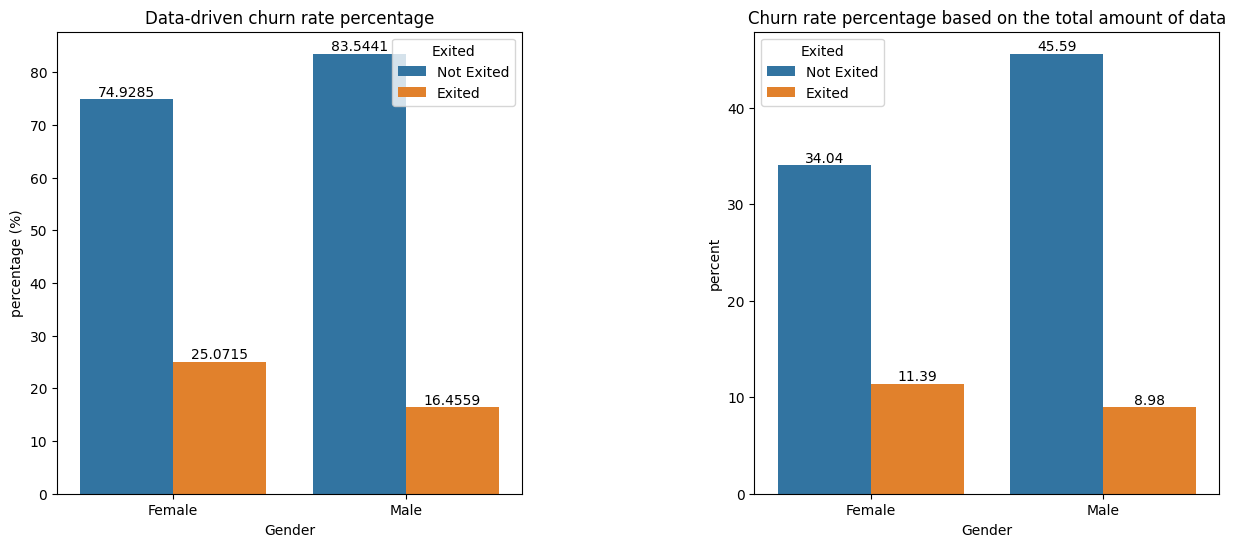

In [34]:
biv("Gender")

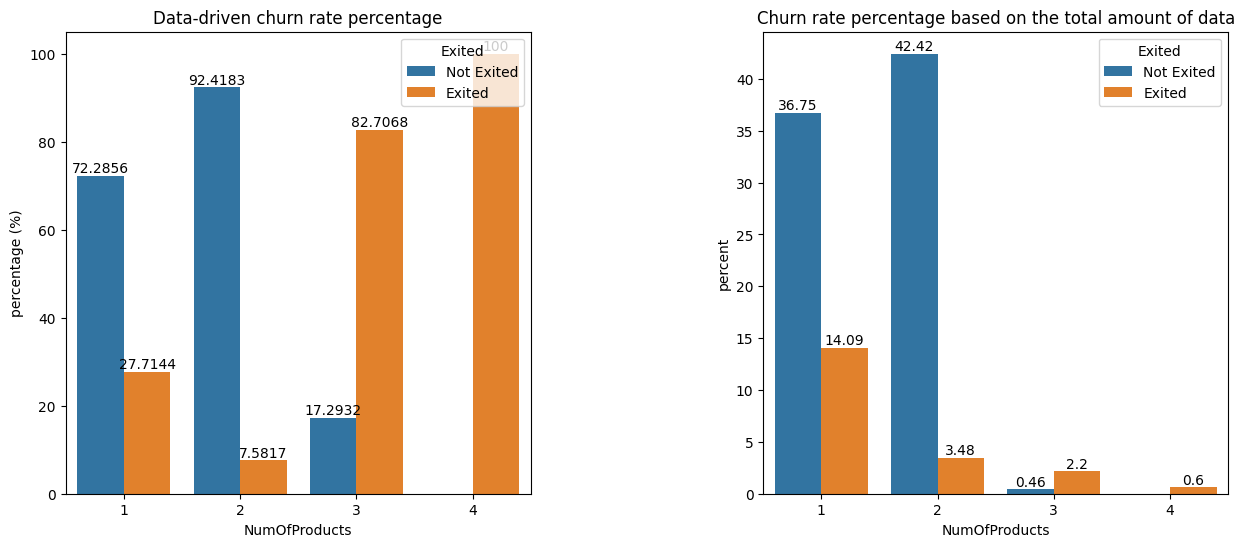

In [35]:
biv("NumOfProducts")

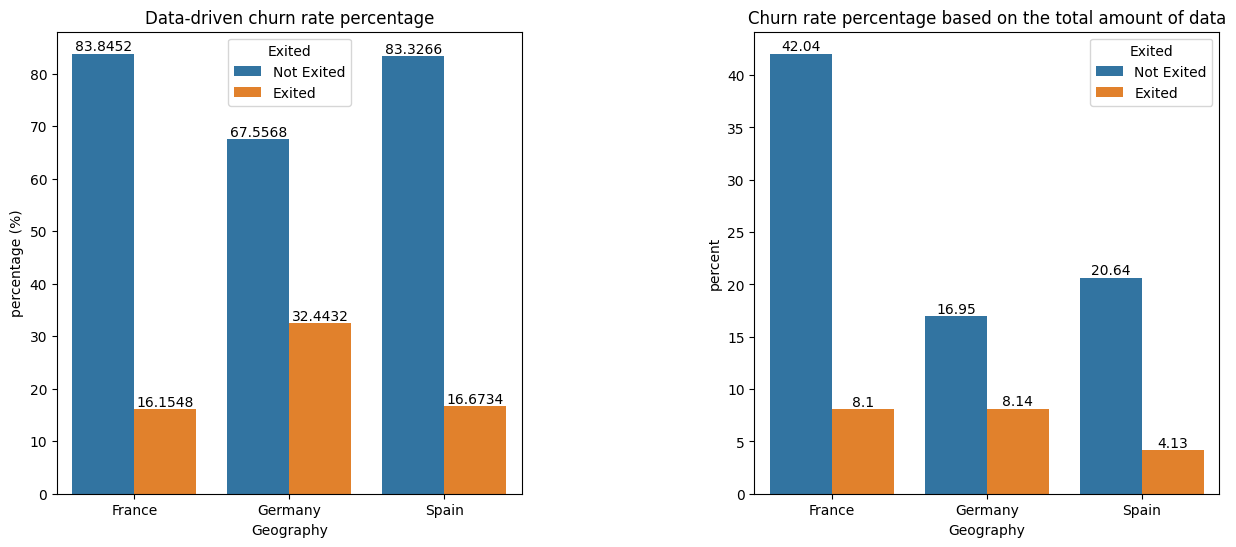

In [36]:
biv("Geography")

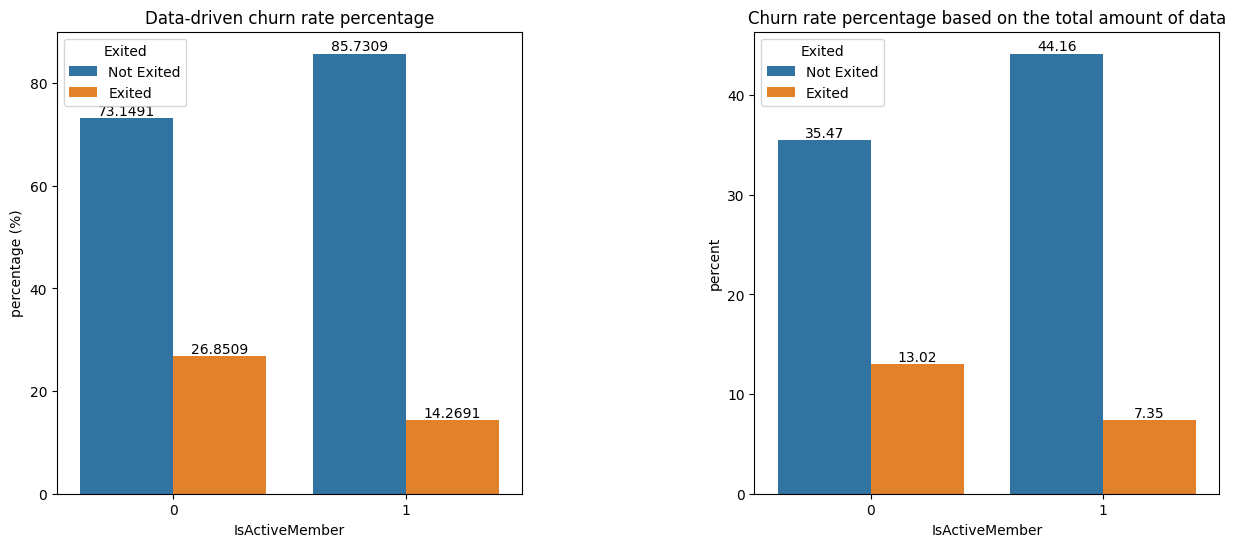

In [37]:
biv("IsActiveMember")

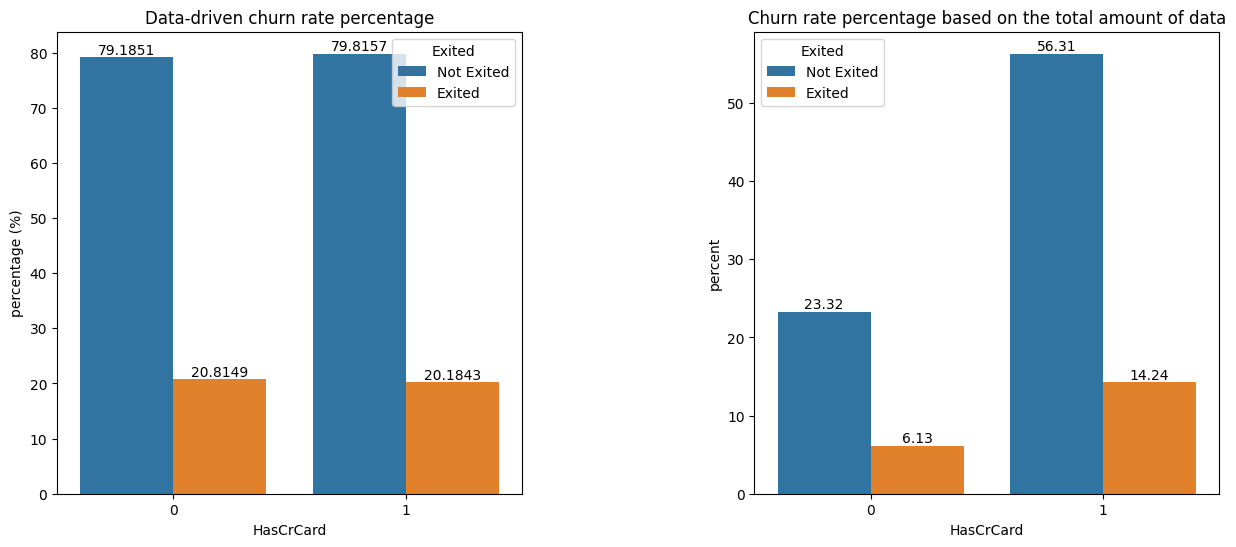

In [38]:
biv("HasCrCard")

In [40]:
df['CreditScoreGroup'] = np.where(df['CreditScore'] < 580, 'Poor',
                         np.where(df['CreditScore'] < 670, 'Fair',
                         np.where(df['CreditScore'] < 740, 'Good',
                         np.where(df['CreditScore'] < 800, 'Very good', 'Excellent'))))

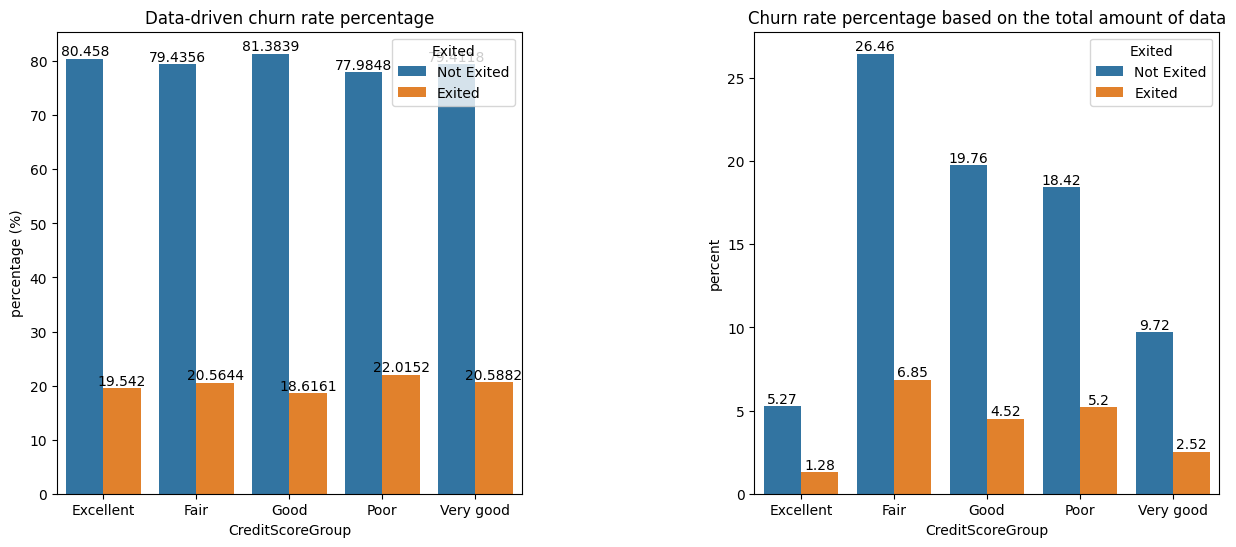

In [41]:
biv('CreditScoreGroup')

In [42]:
# Calculate the 25th and 75th percentiles of the balance column
balance_25 = df['Balance'].quantile(0.25)
balance_75 = df['Balance'].quantile(0.75)

# Create a new column called 'BalanceGroup' and assign values based on the balance value
df['BalanceGroup'] = np.where(df['Balance'] < df['Balance'].quantile(0.7), 'Low',
                              np.where(df['Balance'] > df['Balance'].quantile(0.75), 'High', 'Medium'))

In [43]:
balance_75

127644.24

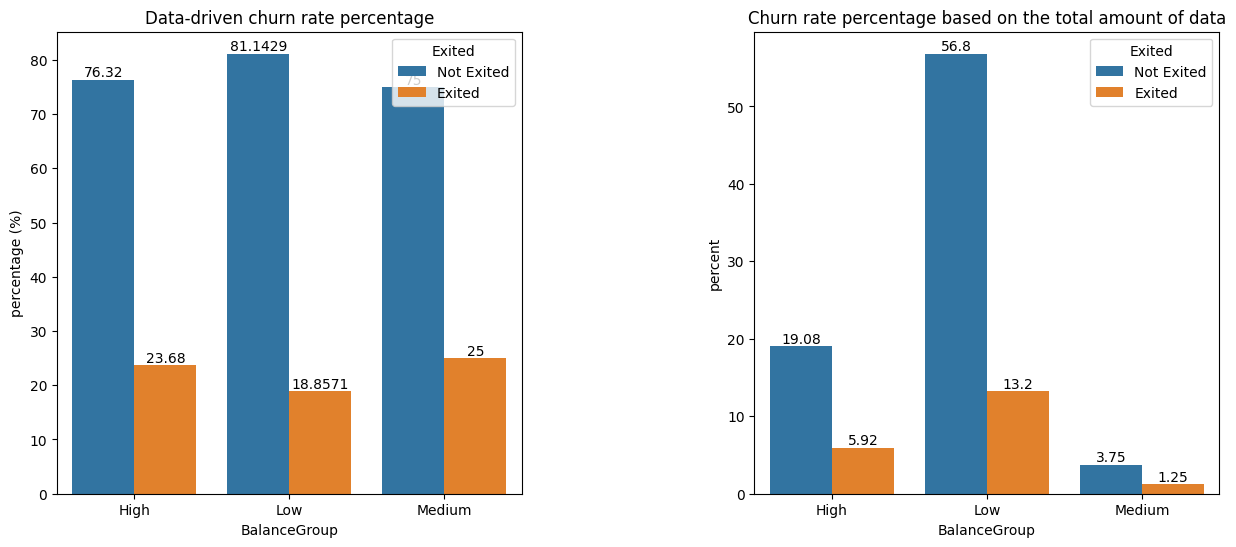

In [44]:
biv("BalanceGroup")

NO Duplicate Data

In [45]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGroup,BalanceGroup
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair,Low
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair,Low
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor,High
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good,Low
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Very good,Low
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Poor,Low
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Good,Low
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Very good,Low
